## Final Project Submission

Please fill out:
* Student name: Claudia Sagini
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


# Introduction
In this project, I will be conducting exploratory data analysis using movie datasets from various sources to provide insights for Microsoft's new movie studio venture.

## The datasets include information from:
* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB
* The Numbers

By leveraging this diverse data, my goal is to analyze box office performance, audience ratings, critical reviews, and financial data to recommend film genres and themes that are likely to perform well and resonate with audiences, ultimately maximizing Microsoft's success in the movie industry.

## Data Understanding
The datasets used in this project provide a comprehensive range of information, allowing for in-depth analysis of box office performance, audience ratings, critical reviews, and financial data. By integrating data from multiple sources, we can extract meaningful insights that will guide decision-making on future movie productions.

## Business Understanding
The main objective of this project is to identify successful film genres and trends in the box office to assist Microsoft in creating a competitive edge in the movie market. By providing actionable recommendations based on comprehensive data analysis, we aim to drive the success of Microsoft's new movie studio venture by making informed decisions on movie genres, production strategies, and audience targeting.

## Let's get started!!

# 1. Load the Data with Pandas
In the cell below:

* Import and alias pandas as pd
* Import and alias numpy as np
* Import and alias seaborn as sns
* Import and alias sqlite3
* Import and alias matplotlib.pyplot as plt
* Set Matplotlib visualizations to display inline in the notebook

In [234]:
# Importing the necessary libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

## CSV Files
I will analyze CSV files to explore additional movie data. This includes understanding the content, checking for inconsistencies, and preparing the data for further analysis in my exploratory data analysis.


## a) Bom.movies_gross

Loading movie data from 'bom.movie_gross.csv' into a DataFrame for analysis. Previewing the first few rows to understand key movie revenue and release information. This step sets the stage for data cleaning and future insights.

In [235]:
# Reading data
bom_df = pd.read_csv('bom.movie_gross.csv')
bom_df.head() # Get the first 5 rows

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Now we're getting familiar with the data. This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In [236]:
# Check for duplicates
bom_df.duplicated().value_counts()

False    3387
dtype: int64

In [237]:
# Inspect the overall shape of the dataframe:
bom_df.shape

(3387, 5)

In [238]:
# Find out the info printout
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [239]:
# Interpret the above information:
"""The DataFrame has 3387 entries and 5 columns.
'studio' has 5 missing values,
'domestic_gross' has 28 missing values,
and 'foreign_gross' has 1350 missing values.
Data types are 'object' for 3 columns,
'float64' for 1 column, and 'int64' for 1 column."""

"The DataFrame has 3387 entries and 5 columns.\n'studio' has 5 missing values,\n'domestic_gross' has 28 missing values,\nand 'foreign_gross' has 1350 missing values.\nData types are 'object' for 3 columns,\n'float64' for 1 column, and 'int64' for 1 column."

## b) tmdb.movies

In [240]:
#Reading the file
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df # Getting the first and last 5 rows

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [241]:
# Getting rid of the 'Unnamed: 0' column
tmdb_df.drop('Unnamed: 0', axis=1, inplace=True)
tmdb_df.head()  # Get the rows without the 'Unnamed: 0' column

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [242]:
# Check for duplicate values
tmdb_df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [243]:
# Inspect the shape
tmdb_df.shape

(26517, 9)

In [244]:
# Find out the printout info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [245]:
# Interpret the info above
"""All columns have 26,517 non-null values, indicating that there are no missing values in the DataFrame"""

'All columns have 26,517 non-null values, indicating that there are no missing values in the DataFrame'

# c) tn.movies_budgets

In [246]:
# Readin the file
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df.head() # Getting the first 5 rows

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [247]:
# Check for duplicate values
tn_df.duplicated().value_counts()

False    5782
dtype: int64

In [248]:
#Inspect the shape
tn_df.shape

(5782, 6)

In [249]:
# Find out the printout info
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [250]:
#Interpet the info above
"""All columns have 5782 non-null values, indicating that there are no missing values in the DataFrame"""

'All columns have 5782 non-null values, indicating that there are no missing values in the DataFrame'

## TSV Files
I will analyze TSV files to explore additional movie data. This includes understanding the content, checking for inconsistencies, and preparing the data for further analysis in my exploratory data analysis.

## a) movie_info

In [251]:
# Reading data
movie_info_df = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [252]:
# Check for duplicate values
movie_info_df.duplicated().value_counts()

False    1560
dtype: int64

In [253]:
# Inspect shape
movie_info_df.shape

(1560, 12)

In [254]:
# Find printout info
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [255]:
# Interpret above info
"""This file has a lot of missing values in each of the columns except the id column"""

'This file has a lot of missing values in each of the columns except the id column'

## b) reviews

In [256]:
# Reading data 
reviews_df = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding='latin1')
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [257]:
# Check for duplicate values
reviews_df.duplicated().value_counts()

False    54423
True         9
dtype: int64

In [258]:
# Printing out the shape
print(reviews_df.shape)

(54432, 8)


In [259]:
# The printout info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [260]:
# Interpreting the above info
"""This file has got missing values in all columns"""

'This file has got missing values in all columns'

## Extracting files using sqlite3

In [261]:
# Reading the file
conn = sqlite3.connect('im.db')
conn

In [262]:
# Create a cursor
cur = conn.cursor()
cur

In [263]:
# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

OperationalError: database is locked

In [ ]:
# Execute a SQL query
cur.execute('SELECT * FROM movie_basics')

#Fetch rows
movie_basics = cur.fetchone() # fetched a row
movie_basics

# 2. Data Cleaning
I will be cleaning data by checking for any missng values

## Identify missing values and data cleaning in bom_df 

In [264]:
print(bom_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [271]:
# Check for missing values in each column
bom_df.isnull().sum()

# 2. Decide on the Handling Strategy
# Decide whether to impute, remove, or fill the missing values

# 3. Imputation (Example: filling missing values with mean for numerical columns)
# Fill missing values in 'domestic_gross' with the mean
mean_domestic = bom_df['domestic_gross'].mean()
bom_df['domestic_gross'].fillna(mean_domestic, inplace=True)

# 4. Removal (Example: removing rows with missing values in 'studio')
# Drop rows with missing values in 'studio'
bom_df.dropna(subset=['studio'], inplace=True)
bom_df.dropna(subset=['foreign_gross'], inplace=True)


# Check for duplicate rows
duplicate_rows = bom_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
bom_df.drop_duplicates(inplace=True)

# Check for unique values in each column
unique_values = bom_df.nunique()
print('Unique values:\n', unique_values)

# Check if missing values have been handled
bom_df.isnull().sum()

Number of duplicate rows: 0
Unique values:
 title             2033
studio             175
domestic_gross    1296
foreign_gross     1203
year                 9
dtype: int64


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## Identifying missing values and data cleaning in tmdb_df

In [272]:
# Check the columns in tmdb_df
print(tmdb_df.columns)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [273]:
# Check for missing values in each column
tmdb_df.isnull().sum()

# Decide on the Handling Strategy

# Imputation (Example: filling missing values with mean for numerical columns)

# Fill missing values in 'vote_average' with the mean
mean_vote_average = tmdb_df['vote_average'].mean()
tmdb_df['vote_average'].fillna(mean_vote_average, inplace=True)

# Check for duplicate rows
duplicate_rows = tmdb_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
tmdb_df.drop_duplicates(inplace=True)

# Check for unique values in each column
unique_values = tmdb_df.nunique()
print('Unique values:\n', unique_values)

# Check if missing values have been handled
tmdb_df.isnull().sum()

Number of duplicate rows: 1020
Unique values:
 genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Identifying missing values and data cleaning in tn_df

In [274]:
# Print tn_df columns
print(tn_df.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [275]:
# Check for missing values in each column
print(tn_df.isnull().sum())

# Convert numeric columns to string type
tn_df['production_budget'] = tn_df['production_budget'].astype(str)
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(str)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(str)

# Remove commas and dollar signs from numerical columns using strip()
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)


# Imputation: Fill missing values with mean for numerical columns
for column in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    mean_value = tn_df[column].mean()
    tn_df[column].fillna(mean_value, inplace=True)

# Removal: Drop rows with missing values in 'release_date' column
tn_df.dropna(subset=['release_date'], inplace=True)

# Check for duplicate rows
duplicate_rows = tn_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
tn_df.drop_duplicates(inplace=True)

# Check for unique values in each column
unique_values = tn_df.nunique()
print('Unique values:\n', unique_values)

# Check if missing values have been handled
print(tn_df.isnull().sum())

# # Additional Debugging: Print a sample of the DataFrame to check the data
# print(tn_df.head())

# # Check the data types of columns in the DataFrame
# print(tn_df.dtypes)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Number of duplicate rows: 0
Unique values:
 id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Identifying missing values and data cleaning in movies_info_df

In [276]:
print(movie_info_df.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [278]:
# Check for missing values in each column
print(movie_info_df.isnull().sum())

# Imputation: Fill missing values in 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', and 'dvd_date' with appropriate values

# Fill missing values in 'synopsis' with a placeholder or appropriate text
movie_info_df['synopsis'].fillna('No synopsis available', inplace=True)

# Fill missing values in 'rating' with a placeholder or appropriate text
movie_info_df['rating'].fillna('Not Rated', inplace=True)

# Fill missing values in 'genre', 'director', 'writer', 'theater_date', and 'dvd_date' with 'Not Available'
cols_to_fill = ['genre', 'director', 'writer', 'theater_date', 'dvd_date']
for col in cols_to_fill:
    movie_info_df[col].fillna('Not Available', inplace=True)

# Check for duplicate rows
duplicate_rows = movie_info_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
movie_info_df.drop_duplicates(inplace=True)

# Check for unique values in each column
unique_values = movie_info_df.nunique()
print('Unique values:\n', unique_values)

# Check if missing values have been handled
print(movie_info_df.isnull().sum())

# # Additional Debugging: Print a sample of the DataFrame to check the data
# print(movie_info_df.head())

# # Check the data types of columns in the DataFrame
# print(movie_info_df.dtypes)

id                 0
synopsis           0
rating             0
genre              0
director           0
writer             0
theater_date       0
dvd_date           0
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
Number of duplicate rows: 0
Unique values:
 id              1560
synopsis        1498
rating             7
genre            300
director        1126
writer          1070
theater_date    1026
dvd_date         718
currency           1
box_office       336
runtime          142
studio           200
dtype: int64
id                 0
synopsis           0
rating             0
genre              0
director           0
writer             0
theater_date       0
dvd_date           0
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


### #Now there are some missing values in the 'currency', 'box_office' and 'studio' columns.
### Solution:
Remove rows with missing values in 'currency', 'box_office', and 'studio' columns

In [279]:
movie_info_df_cleaned = movie_info_df.dropna(subset=['currency', 'box_office', 'studio'])

# Drop rows with missing values in 'runtime'
movie_info_df_cleaned = movie_info_df_cleaned.dropna(subset=['runtime'])

# Clean up 'runtime' column by removing 'minutes' and converting to int
movie_info_df_cleaned['runtime'] = movie_info_df_cleaned['runtime'].str.replace(' minutes', '').astype(int)
#Display the cleaned DataFrame and check for any remaining issues
movie_info_df_cleaned

# Now the DataFrame should be clean without missing values in 'currency', 'box_office', or 'studio' columns,
# and 'runtime' column should have been converted to integer values.

# # Display the cleaned DataFrame
# print(movie_info_df_cleaned)

# Check for any remaining missing values
print(movie_info_df_cleaned.isnull().sum())

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64


## Identifying missing values and data cleaning in reviews_df

In [280]:
# Printing the columns of review_df
print(reviews_df.columns)

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [281]:
# Check for missing values in each column
print(reviews_df.isnull().sum())

# Imputation: Fill missing values in 'review', 'rating', 'critic', and 'publisher' columns with appropriate values

# Fill missing values in 'review' with a placeholder or appropriate text
reviews_df['review'].fillna('No review', inplace=True)

# Convert non-numeric ratings to NaN and then to float
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Fill missing values in 'rating' with the median rating
median_rating = reviews_df['rating'].median()
reviews_df['rating'].fillna(median_rating, inplace=True)
# Fill missing values in 'critic' and 'publisher' with 'Unknown'
cols_to_fill = ['critic', 'publisher']
for col in cols_to_fill:
    reviews_df[col].fillna('Unknown', inplace=True)

# Check for duplicate rows
duplicate_rows = reviews_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
reviews_df.drop_duplicates(inplace=True)

# Check for unique values in each column
unique_values = reviews_df.nunique()
print('Unique values:\n', unique_values)

# Check if missing values have been handled
print(reviews_df.isnull().sum())

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
Number of duplicate rows: 25
Unique values:
 id             1135
review        48683
rating           46
fresh             2
critic         3497
top_critic        2
publisher      1282
date           5963
dtype: int64
id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64


### Cleaning data in im.db

In [282]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()

# Iterate over each table and fetch its contents
for table in tables:
    table_name = table[0]
    print(f"Contents of table '{table_name}':")
    cur.execute(f"SELECT * FROM {table_name}")
    rows = cur.fetchone()
    for row in rows:
        print(row)

OperationalError: database is locked

In [283]:
# I created a function to clean each table
def clean_table(table_name):
    print(f"Cleaning table '{table_name}'...")
    
    # Fetch column names
    cur.execute(f"PRAGMA table_info({table_name})")
    columns = [col[1] for col in cur.fetchall()]
    
    # Handling missing values
    null_conditions = [f"{col} IS NULL" for col in columns]
    null_condition_str = " OR ".join(null_conditions)
    if null_condition_str:
        cur.execute(f"DELETE FROM {table_name} WHERE rowid IN (SELECT rowid FROM {table_name} WHERE {null_condition_str})")
    
    # Removing duplicates
    unique_columns = ', '.join(columns)
    cur.execute(f"DELETE FROM {table_name} WHERE rowid NOT IN (SELECT MIN(rowid) FROM {table_name} GROUP BY {unique_columns})")
    
    print(f"Table '{table_name}' cleaned successfully.")

In [284]:
# Clean each table
# Clean each table
for table in tables:
    table_name = table[0]
    clean_table(table_name)



Cleaning table 'movie_basics'...


OperationalError: database is locked

# 3. Data Visualizations
To gain sight from the above datasets, I will go through them with explanations for each step of the exploratory data analysis (EDA) process

### a) bom.movie_gross
#### 1: Display basic information about the DataFrame


In [285]:
# 1: Display basic information about the DataFrame
print("Basic information about the DataFrame:")
print(bom_df.info())
print("\nFirst few rows of the DataFrame:")
print(bom_df.head())

# 2: Summary statistics
print("\nSummary statistics of the DataFrame:")
print(bom_df.describe())

# 3: Check for missing values
print("\nMissing values in the DataFrame:")
print(bom_df.isnull().sum())


Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2033 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2033 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            2033 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.3+ KB
None

First few rows of the DataFrame:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   


#### 2: Visualize the relationship between domestic gross and foreign gross
I will be using:
* Histograms
* Scatterplot

To display my information:


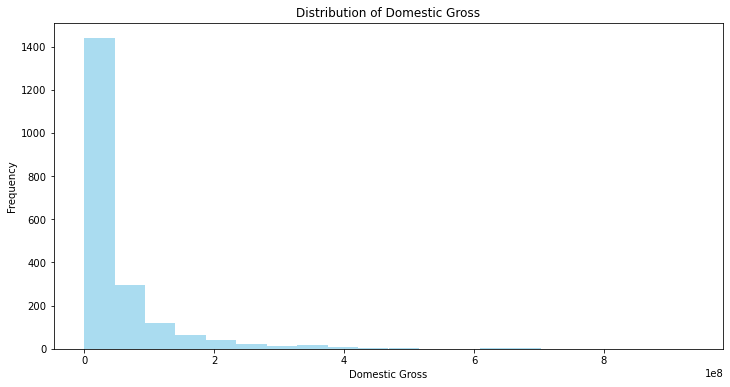

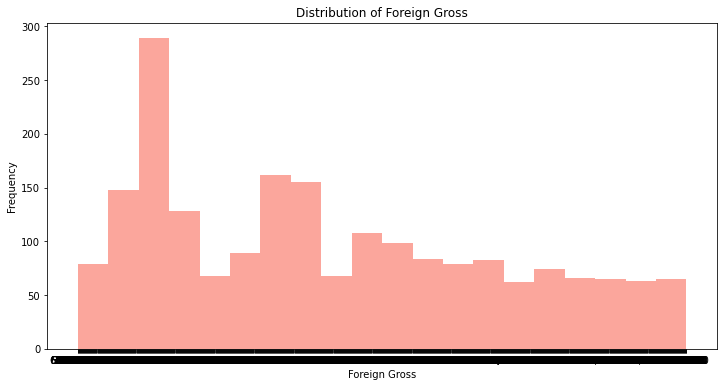

In [286]:
# Create a histogram for Domestic Gross
plt.figure(figsize=(12, 6))
plt.hist(bom_df['domestic_gross'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')

plt.show();

# Create a histogram for Foreign Gross
plt.figure(figsize=(12, 6))
plt.hist(bom_df['foreign_gross'], bins=20, color='salmon', alpha=0.7)
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')

plt.show();

#### 3: Visualize the distribution of domestic gross with a histogram


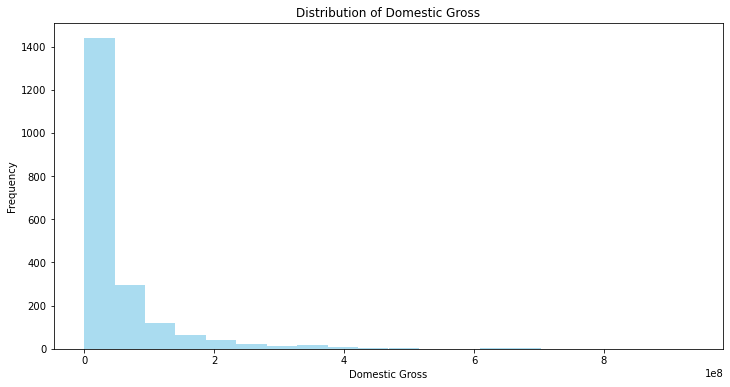

In [287]:
# Create a histogram for Domestic Gross
plt.figure(figsize=(12, 6))
plt.hist(bom_df['domestic_gross'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')

plt.show();

### b) tmdb.movies
#### 1: Display basic information about the DataFrame

In [288]:
print("Basic information about the DataFrame:")
print(tmdb_df.info())
print("\nFirst few rows of the DataFrame:")
print(tmdb_df.head())

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB
None

First few rows of the DataFrame:
             genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 1075

#### 2: Visualize the distribution of vote averages with a histogram


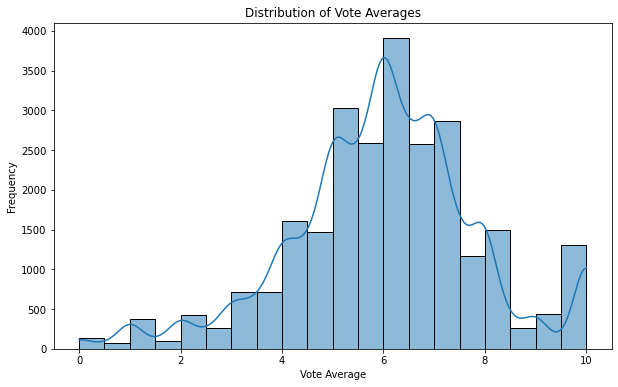

In [289]:
plt.figure(figsize=(10, 6))

sns.histplot(tmdb_df['vote_average'], bins=20, kde=True)

plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show();

### c) tn.movie_budgets
#### 1: Display basic information about the DataFrame

In [290]:
print("Basic information about the DataFrame:")
print(tn_df.info())
print("\nFirst few rows of the DataFrame:")
print(tn_df.head())

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 316.2+ KB
None

First few rows of the DataFrame:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017         

#### 2: Visualize the production budget distribution with a histogram

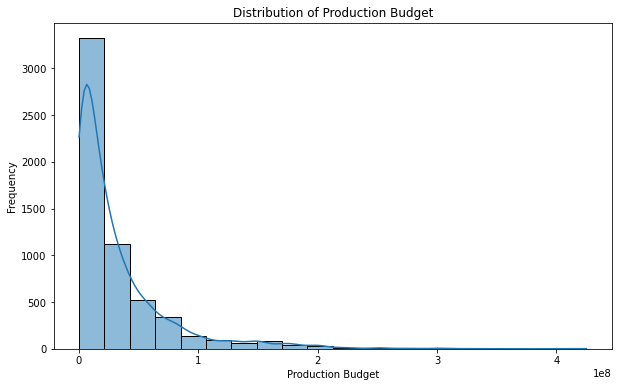

In [291]:
plt.figure(figsize=(10, 6))
sns.histplot(tn_df['production_budget'], bins=20, kde=True)
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show()

### d) rt.movie_info
#### 1: Display basic information about the DataFrame

In [292]:
print("Basic information about the DataFrame:")
print(movie_info_df_cleaned.info())
print("\nFirst few rows of the DataFrame:")
print(movie_info_df_cleaned.head())

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            304 non-null    int64 
 1   synopsis      304 non-null    object
 2   rating        304 non-null    object
 3   genre         304 non-null    object
 4   director      304 non-null    object
 5   writer        304 non-null    object
 6   theater_date  304 non-null    object
 7   dvd_date      304 non-null    object
 8   currency      304 non-null    object
 9   box_office    304 non-null    object
 10  runtime       304 non-null    int32 
 11  studio        304 non-null    object
dtypes: int32(1), int64(1), object(10)
memory usage: 29.7+ KB
None

First few rows of the DataFrame:
    id                                           synopsis rating  \
1    3  New York City, not-too-distant-future: Eric Pa...      R   
6   10  Some cast and crew fro

#### 2: Countplot of ratings in the dataset

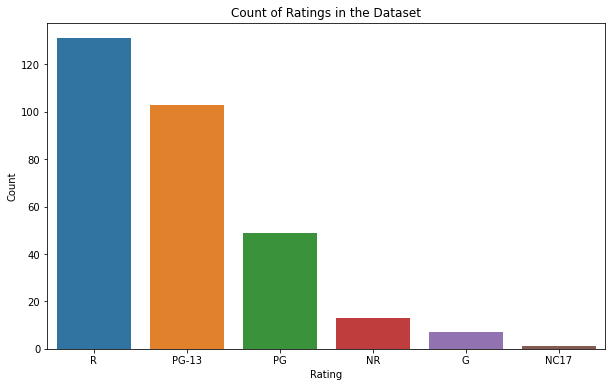

In [293]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movie_info_df_cleaned)
plt.title('Count of Ratings in the Dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### e) rt.reviews
#### 1: Display basic information about the DataFrame

In [294]:
print("Basic information about the DataFrame:")
print(reviews_df.info())
print("\nFirst few rows of the DataFrame:")
print(reviews_df.head())

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54407 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          54407 non-null  int64  
 1   review      54407 non-null  object 
 2   rating      54407 non-null  float64
 3   fresh       54407 non-null  object 
 4   critic      54407 non-null  object 
 5   top_critic  54407 non-null  int64  
 6   publisher   54407 non-null  object 
 7   date        54407 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.7+ MB
None

First few rows of the DataFrame:
   id                                             review  rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...     6.0   fresh   
1   3  It's an allegory in search of a meaning that n...     6.0  rotten   
2   3  ... life lived in a bubble in financial dealin...     6.0   fresh   
3   3  Continuing along a line introdu

#### 2: Pie chart of fresh vs rotten ratings

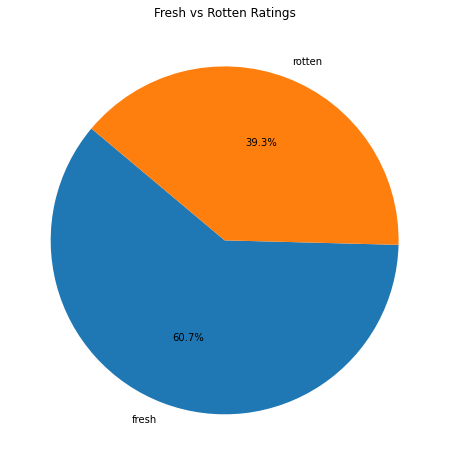

In [295]:
plt.figure(figsize=(8, 8))
ratings_count = reviews_df['fresh'].value_counts()
plt.pie(ratings_count, labels=ratings_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Fresh vs Rotten Ratings')
plt.show() 

# 4. Summary Analysis

### a)bom_df
#### 1: Display basic information about the DataFrame

In [296]:
print(bom_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2033 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2033 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            2033 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.3+ KB
None


#### 2: Display a summary of statistics for numerical columns

In [297]:
print(bom_df.describe())

       domestic_gross         year
count    2.033000e+03  2033.000000
mean     4.678613e+07  2013.494835
std      8.112899e+07     2.591836
min      4.000000e+02  2010.000000
25%      7.030000e+05  2011.000000
50%      1.750000e+07  2013.000000
75%      5.550000e+07  2016.000000
max      9.367000e+08  2018.000000


#### 3: Plot a histogram of domestic gross revenue

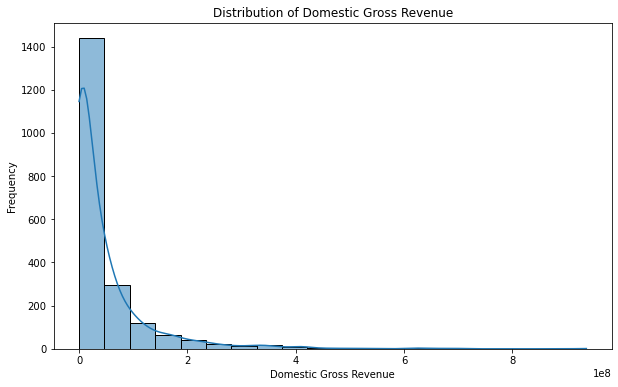

In [298]:
plt.figure(figsize=(10, 6))
sns.histplot(bom_df['domestic_gross'], bins=20, kde=True)

plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Frequency')

plt.show();

### b) tmdb.movies
#### 1: Display basic information about the DataFrame


In [299]:
print(tmdb_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB
None


#### 2: Display summary statistics for numerical columns

In [300]:
print(tmdb_df.describe())

                  id    popularity  vote_average    vote_count
count   25497.000000  25497.000000  25497.000000  25497.000000
mean   294203.960505      3.043279      5.979331    178.795780
std    154690.249660      4.261045      1.866094    914.150311
min        27.000000      0.600000      0.000000      1.000000
25%    154770.000000      0.600000      5.000000      1.000000
50%    307125.000000      1.321000      6.000000      5.000000
75%    420707.000000      3.490000      7.000000     25.000000
max    608444.000000     80.773000     10.000000  22186.000000


#### 3: Plot a bar chart of the top 10 movie genres

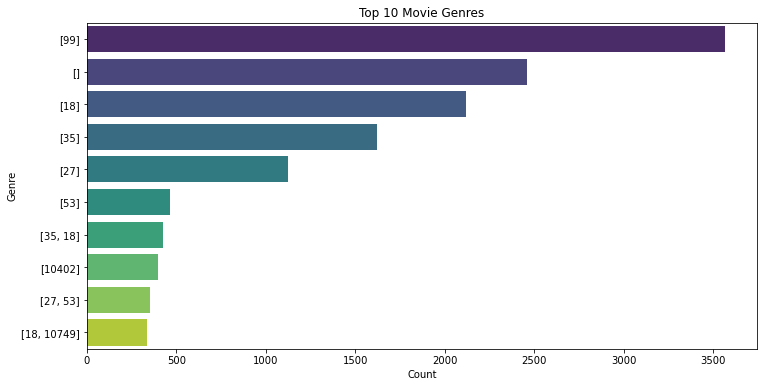

In [301]:
genres_count = tmdb_df['genre_ids'].explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show();

### c) tn.movie_budgets
#### 1: Display basic information about the DataFrame


In [302]:
print(tn_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 316.2+ KB
None


#### 2: Display summary statistics for numerical columns

In [303]:
print(tn_df.describe())

                id  production_budget  domestic_gross  worldwide_gross
count  5782.000000       5.782000e+03    5.782000e+03     5.782000e+03
mean     50.372363       3.158776e+07    4.187333e+07     9.148746e+07
std      28.821076       4.181208e+07    6.824060e+07     1.747200e+08
min       1.000000       1.100000e+03    0.000000e+00     0.000000e+00
25%      25.000000       5.000000e+06    1.429534e+06     4.125415e+06
50%      50.000000       1.700000e+07    1.722594e+07     2.798445e+07
75%      75.000000       4.000000e+07    5.234866e+07     9.764584e+07
max     100.000000       4.250000e+08    9.366622e+08     2.776345e+09


#### 3: Plot a scatter plot of production budget vs worldwide gross


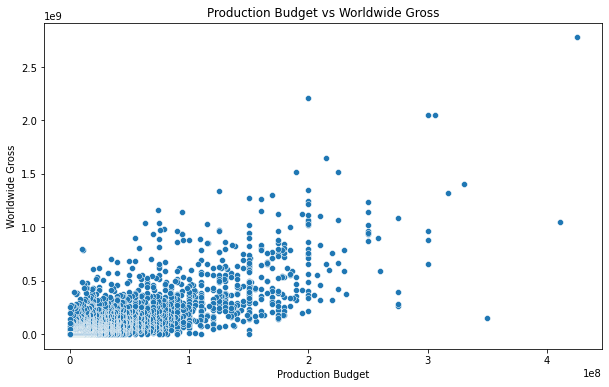

In [304]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=tn_df)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

### d) movie_info_df
#### 1: Display basic information about the DataFrame


In [305]:
print(movie_info_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 158.4+ KB
None


#### 2: Display summary statistics for numerical columns

In [306]:
print(movie_info_df.describe())

                id
count  1560.000000
mean   1007.303846
std     579.164527
min       1.000000
25%     504.750000
50%    1007.500000
75%    1503.250000
max    2000.000000


#### 3: Plot a bar chart of movie ratings


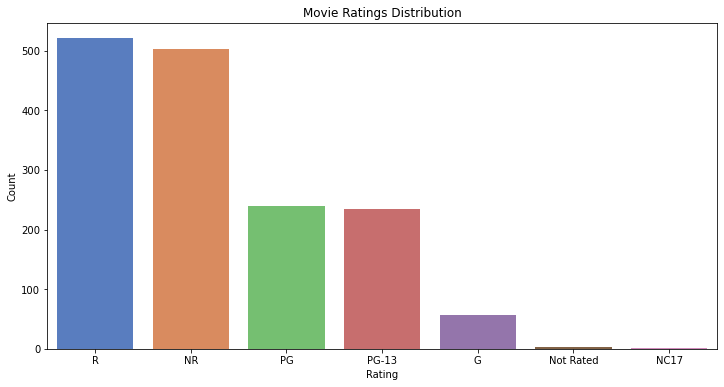

In [307]:
ratings_count = movie_info_df['rating'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='muted')
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 5. Correlation Analysis
Correlation analysis measures the strength and direction of the relationship between numerical variables. In movie data, it helps us understand how financial metrics like production budget, domestic gross, and worldwide gross are related

#### I will be analysing the tn.movies_budgets to get coduct correlation analysis

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 316.2+ KB
None

Correlation Matrix:
                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.685682         0.748306
domestic_gross              0.685682        1.000000         0.938853
worldwide_gross             0.748306        0.938853         1.000000


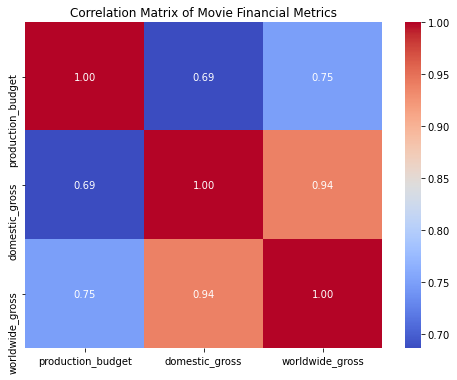

In [309]:
print("Basic information about the DataFrame:")
print(tn_df.info())

# Display correlation matrix
correlation_matrix = tn_df[['production_budget', 'domestic_gross', 'worldwide_gross']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Financial Metrics')
plt.show()

#### Interpretation of the output

In [310]:
"""The correlation analysis reveals significant positive relationships between the financial metrics in the dataset, particularly between production budgets and gross earnings. This information can be valuable for decision-making and strategizing in the movie industry, such as budget allocation and revenue forecasting based on historical trends."""

'The correlation analysis reveals significant positive relationships between the financial metrics in the dataset, particularly between production budgets and gross earnings. This information can be valuable for decision-making and strategizing in the movie industry, such as budget allocation and revenue forecasting based on historical trends.'

# 6. Exploratory Data Analysis(EDA)

#### I will be using tmdb.movies to conduct EDA

In [336]:
print(tmdb_df.columns)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [340]:
# Calculate the correlation matrix
correlation_matrix = tmdb_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    id  popularity  vote_average  vote_count
id            1.000000   -0.151993      0.119240   -0.134912
popularity   -0.151993    1.000000      0.057178    0.685285
vote_average  0.119240    0.057178      1.000000    0.079160
vote_count   -0.134912    0.685285      0.079160    1.000000


#### Correlation matrix of Numeric Variables

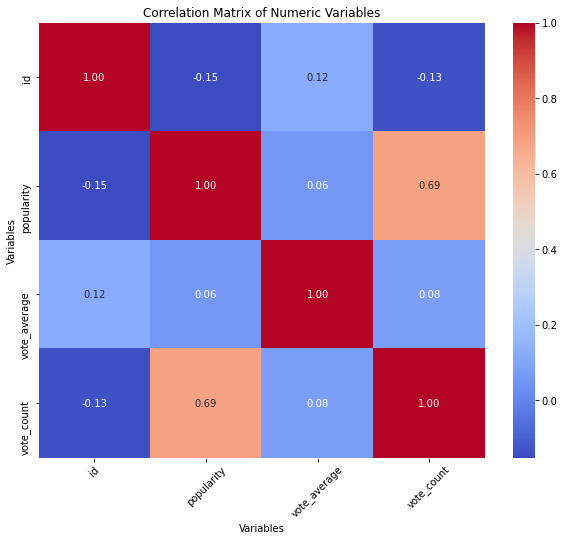

In [347]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title and labels
plt.title('Correlation Matrix of Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show();

#### Interpretation of the figure

In [345]:
"""The correlation coefficients indicate the strength and direction of the linear relationship between pairs of variables. However, it's important to note that correlation does not imply causation, and other factors may influence the relationships observed."""

"The correlation coefficients indicate the strength and direction of the linear relationship between pairs of variables. However, it's important to note that correlation does not imply causation, and other factors may influence the relationships observed."

#### Distribution of vote counts

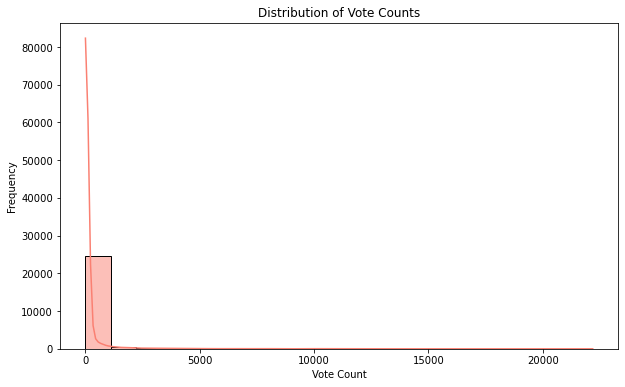

'This visualization helps understand how vote counts are distributed among the movies in the dataset, providing insights into the level of audience engagement or interaction with the movies.'

In [352]:
# Distribution of vote counts
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['vote_count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show();

# Interpretation of the code
"""This visualization helps understand how vote counts are distributed among the movies in the dataset, providing insights into the level of audience engagement or interaction with the movies."""

#### Distribution of Popularity

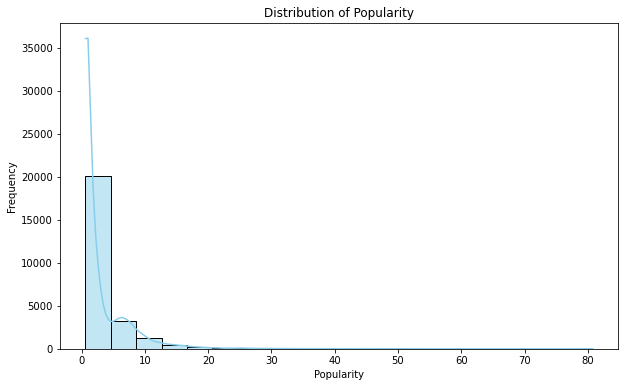

'This visualization helps understand how movie popularity is distributed among the movies in the dataset, providing insights into the overall popularity distribution of the movies.'

In [353]:
# Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show();

# Interpretation of the code
"""This visualization helps understand how movie popularity is distributed among the movies in the dataset, providing insights into the overall popularity distribution of the movies."""

# 7. Exploring Relationships Between Variables
#### I will be using tmdb.movies here

#### Create a Scatter Plot: 
Plot the popularity column on the x-axis and the vote_count column on the y-axis to visualize the relationship between these two variables.

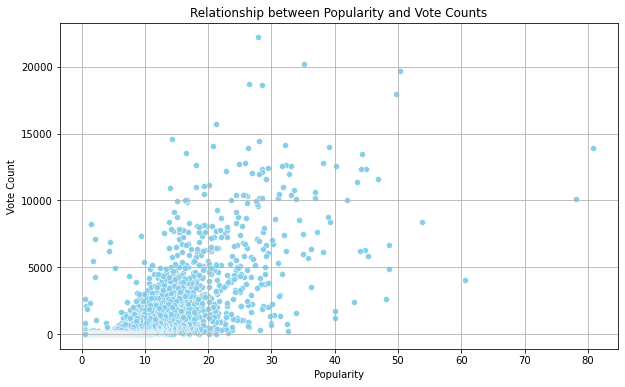

In [355]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_count', data=tmdb_df, color='skyblue')
plt.title('Relationship between Popularity and Vote Counts')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.grid(True)

plt.show();

In [356]:
"""The scatter plot visually confirms the positive relationship between popularity and vote count, showing that movies with higher popularity scores tend to attract more votes from viewers."""

'The scatter plot visually confirms the positive relationship between popularity and vote count, showing that movies with higher popularity scores tend to attract more votes from viewers.'

#### Calculate Correlation Coefficient and Interpretation:
Calculate the correlation coefficient between popularity and vote_count to measure the strength and direction of their linear relationship.

In [357]:
# Calculating the correlation coefficient
correlation_coefficient = tmdb_df['popularity'].corr(tmdb_df['vote_count'])
print("Correlation Coefficient between Popularity and Vote Counts:", correlation_coefficient)

"""The correlation coefficient of 0.6853 indicates a moderately strong positive relationship between movie popularity and vote count in the dataset. This suggests that movies with higher popularity scores tend to receive more votes, reflecting higher viewer engagement and interest."""

Correlation Coefficient between Popularity and Vote Counts: 0.6852852762595905


'The correlation coefficient of 0.6853 indicates a moderately strong positive relationship between movie popularity and vote count in the dataset. This suggests that movies with higher popularity scores tend to receive more votes, reflecting higher viewer engagement and interest.'

In [358]:
# Calculating the correlation coefficient
correlation_coefficient = tmdb_df['popularity'].corr(tmdb_df['vote_count'])
print("Correlation Coefficient between Popularity and Vote Counts:", correlation_coefficient)

Correlation Coefficient between Popularity and Vote Counts: 0.6852852762595905


# Analysis of Movie Data for Microsoft's Movie Studio

## Introduction
In this analysis, we explore insights from movie data to inform decision-making for Microsoft's movie studio. By examining factors such as vote counts, popularity scores, and correlations between variables, we aim to identify patterns and trends that can guide content creation, marketing strategies, and audience engagement efforts.

## Overview of Key Findings
This analysis covers several key findings:
1. Distribution of Vote Counts
2. Distribution of Popularity
3. Correlation Analysis
4. Relating Findings to Business Objectives
5. Generating Actionable Insights
6. Prioritizing Insights

Let's dive into each finding and its implications for Microsoft's movie studio.

## 1. Distribution of Vote Counts

The distribution of vote counts appears to be right-skewed, with a majority of movies having lower vote counts. There are a few movies with significantly higher vote counts, suggesting that they may be highly popular or influential.

### Visualizing Vote Counts Distribution


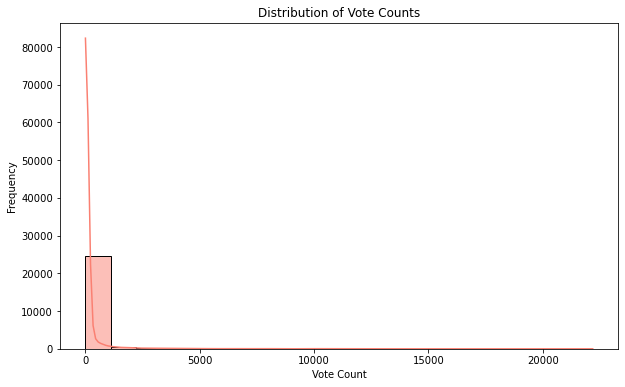

'This histogram illustrates the distribution of vote counts among movies in the dataset. We observe that the majority of movies have lower vote counts, with a long tail indicating a few movies with significantly higher vote counts.\n'

In [364]:
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['vote_count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show();

"""This histogram illustrates the distribution of vote counts among movies in the dataset. We observe that the majority of movies have lower vote counts, with a long tail indicating a few movies with significantly higher vote counts.
"""

## 2. Distribution of Popularity

The distribution of popularity scores shows variability, with some movies being much more popular than others. The distribution seems to have a long tail, indicating that there are a few highly popular movies that drive the overall distribution.

### Visualizing Popularity Distribution

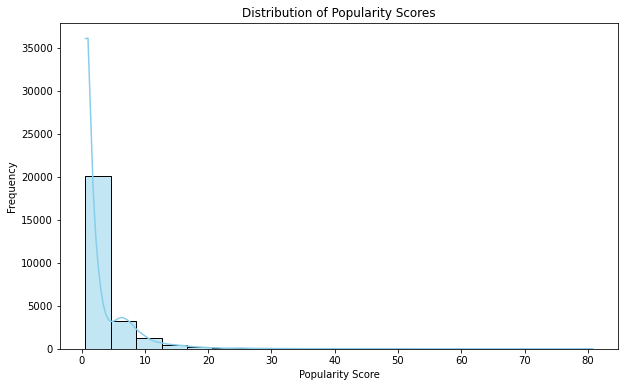

'This histogram illustrates the distribution of popularity scores among movies in the dataset. We observe variability in popularity scores, with a long tail indicating the presence of highly popular movies.'

In [365]:
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show();

"""This histogram illustrates the distribution of popularity scores among movies in the dataset. We observe variability in popularity scores, with a long tail indicating the presence of highly popular movies."""

## 3.Correlation Analysis
The correlation matrix reveals insights into the relationships between variables such as popularity, vote count, and vote average. Understanding these correlations can provide valuable insights into audience engagement and movie success.

### Visualizing Correlation Matrix


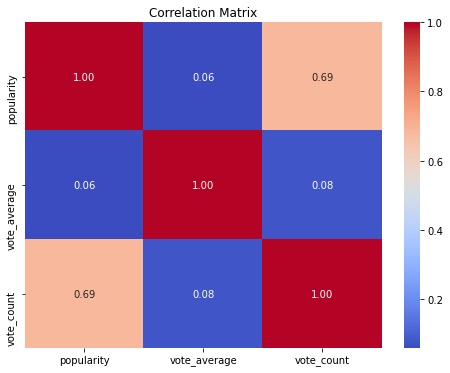

'The heatmap above displays the correlation matrix between popularity, vote average, and vote count. We observe a moderate positive correlation (0.685) between popularity and vote count, suggesting that movies with higher popularity tend to have more votes. Other correlations, such as between vote count and vote average (0.079), are relatively weak.'

In [366]:
plt.figure(figsize=(8, 6))
sns.heatmap(tmdb_df[['popularity', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show();

"""The heatmap above displays the correlation matrix between popularity, vote average, and vote count. We observe a moderate positive correlation (0.685) between popularity and vote count, suggesting that movies with higher popularity tend to have more votes. Other correlations, such as between vote count and vote average (0.079), are relatively weak."""

# Relating Findings to Business Objectives:

## 1.Understanding Audience Engagement:
- The analysis of vote counts provides insights into audience engagement with movies. This information can help Microsoft's movie studio understand which movies resonate most with viewers and potentially replicate their success.

## 2.Identifying Popular Movies:
- The examination of popularity scores helps identify movies that have a significant impact on audiences. By understanding the characteristics of these popular movies, Microsoft can tailor their content strategy to create similarly successful films.

## 3.Assessing Correlations:
- The correlations between variables such as popularity, vote count, and vote average provide insights into how these factors relate to each other. Understanding these relationships can inform decision-making regarding marketing strategies, content creation, and audience targeting.

# Generating Actionable Insights:
## 1.Invest in Audience Engagement:
- Microsoft should prioritize creating content that drives high audience engagement, as reflected in vote counts. This may involve focusing on genres or themes that elicit strong emotional responses or resonate with specific demographics.

## 2.Emphasize Popularity Drivers:
- By analyzing characteristics shared by highly popular movies, Microsoft can identify key factors that contribute to audience appeal. This could include casting popular actors, leveraging established franchises, or creating compelling marketing campaigns.

## 3.Optimize Marketing Efforts:
- Given the moderate correlation between popularity and vote count, Microsoft should consider investing in marketing initiatives that boost a movie's visibility and appeal. Targeted advertising campaigns, social media promotions, and partnerships with influencers could help increase a movie's reach and engagement.

# Prioritizing Insights:

## 1.Audience Engagement: 
- Given its importance in driving overall movie success, prioritizing efforts to enhance audience engagement should be a top priority for Microsoft.

## 2.Identifying Popular Movies: 
- Understanding the characteristics of highly popular movies can inform content creation strategies and help Microsoft allocate resources effectively.

## 3.Optimizing Marketing: 
- Investing in marketing initiatives that capitalize on the relationship between popularity and vote count can maximize the impact of Microsoft's promotional efforts.

# Conclusion:

The analysis of movie data provides valuable insights for Microsoft's movie studio. By examining vote counts, popularity scores, and correlations between variables, we have gained a deeper understanding of audience engagement, movie popularity, and key drivers of success. These insights can inform strategic decision-making and help Microsoft create content that resonates with viewers, optimize marketing efforts, and maximize the impact of its movie productions.

# References:

* The Movie Database (TMDb): https://www.themoviedb.org/
* Seaborn Documentation: https://seaborn.pydata.org/
* Matplotlib Documentation: https://matplotlib.org/
* Pandas Documentation: https://pandas.pydata.org/
* NumPy Documentation: https://numpy.org/

By incorporating these findings into Microsoft's movie studio operations, the company can enhance its competitiveness in the film industry and deliver compelling content to audiences worldwide.